In [1]:
%matplotlib inline
from pylab import *

In [2]:
from treatment_sims_2023_06_02 import *

Splikes version  0.1.2
Plasticnet version  0.1.10
macOS-14.4-arm64-arm-64bit


In [5]:
from deficit_defs import *

In [7]:
base_image_file='asdf/bbsk081604_all_scale2.asdf'


## bottom of sigmoid=-1 (make sure initial weights are higher)

In [10]:
dt=200*ms

im=pi5.filtered_images(
                    base_image_file,
                    {'type':'dog','sd1':1,'sd2':3},
                    {'type':'norm'},
                    )
    
pre1=pn.neurons.natural_images(im,
                                rf_size=19,
                                time_between_patterns=dt,
                                            verbose=False)

sigma=0.1
pre1+=pn.neurons.process.add_noise_normal(0,sigma)

pre=pre1

number_of_neurons=12
post=pn.neurons.linear_neuron(number_of_neurons)
post+=pn.neurons.process.sigmoid(-1,50)

c=pn.connections.BCM(pre,post,[-.1,.1],[.1,.2])
c+=pn.connections.process.orthogonalization(10*minute)
c.eta=1e-5
c.tau=15*pn.minute   

total_time=5*day
save_interval=10*minute

sim=pn.simulation(total_time)
sim.dt=dt

sim.monitor(post,['output'],save_interval)
sim.monitor(c,['weights','theta'],save_interval)

pn.run_sim(sim,[pre,post],[c],display_hash=True)

final_weights=c.weights.copy()

 [#############################99% (ETA: 0.2 s)############################# ]Sim Time Elapsed...19.14 s


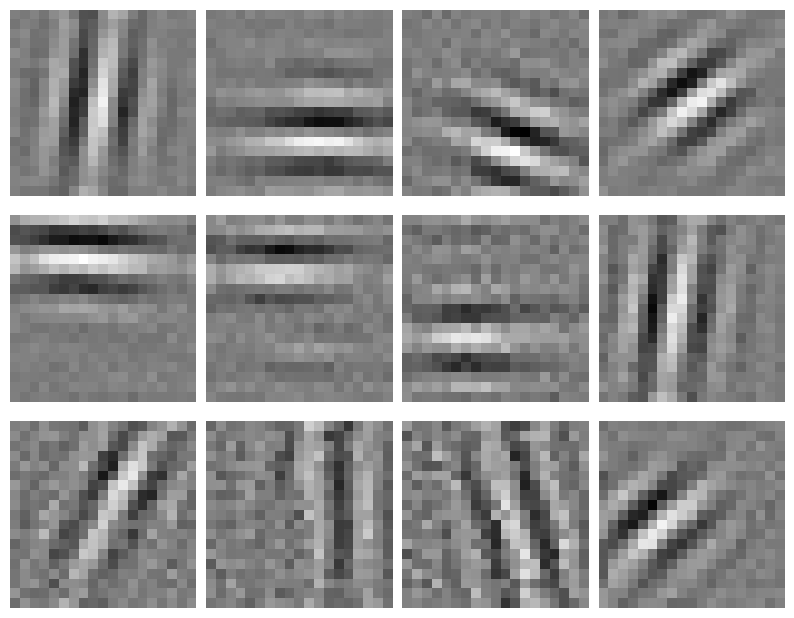

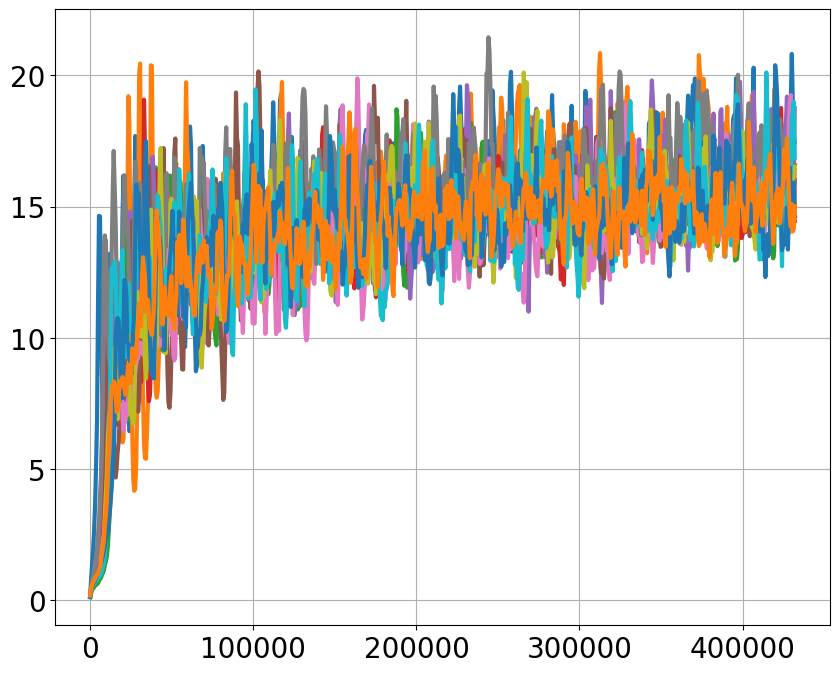

In [12]:
neurons,connections=[pre,post],[c]

c=connections[0]

weights=c.weights
num_neurons=len(weights)
rf_size=neurons[0].rf_size

W=weights.reshape((num_neurons,
                    1,
                    rf_size,rf_size))

vmin,vmax=W.min(),W.max()

count=0
blocks=[]
for row in range(3):
    block_row=[]
    for col in range(4):
        rf=W[count,0,:,:]
        block_row.append(rf)
        if col<4-1:
            block_row.append(vmax*ones((rf_size,1)))

        count+=1

    blocks.append(block_row)

    if row<3-1:
        block_row=[]
        for col in range(4):
            block_row.append(vmax*ones((2,rf_size)))
            if col<4-1:
                block_row.append(vmax*ones((2,1)))
        blocks.append(block_row)


im=np.block(blocks)

figure()
imshow(im,cmap=cm.gray,vmin=vmin,vmax=vmax)
grid(None)
axis('off')

figure()
t,θ=sim.monitors['theta'].arrays()
plot(t,θ);

In [14]:
connections[0].weights=final_weights
y1=pn.utils.get_output_distributions(sim,neurons,connections,total_time=10000,display_hash=False,print_time=False)
connections[0].weights=connections[0].initial_weights
y0=pn.utils.get_output_distributions(sim,neurons,connections,total_time=10000,display_hash=False,print_time=False)

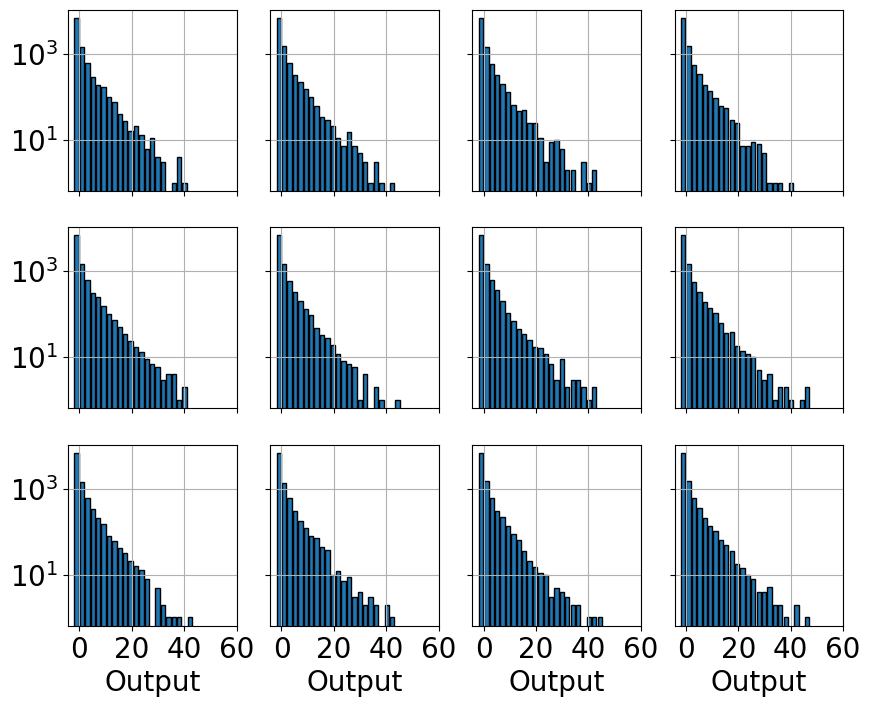

In [16]:

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
nbins=24
alpha=[1,0.5]

for yi,y in enumerate([y1]):

    yn,bins=histogram(y,nbins)
    i=0
    for row in range(3):
        for col in range(4):
            subplot(3,4,i+1)
        
            yn,bins=histogram(y[:,i],bins)
            
            bar(bins[:-1],yn,width=0.8*(bins[1]-bins[0]),edgecolor='k',color=colors[yi],alpha=alpha[yi])
            yscale('log')
            xticks([0,20,40,60])
    
            i+=1
        
            if col!=0:
                gca().set_yticklabels([])
        
            if row!=2:
                gca().set_xticklabels([])
            else:
                xlabel('Output')
    


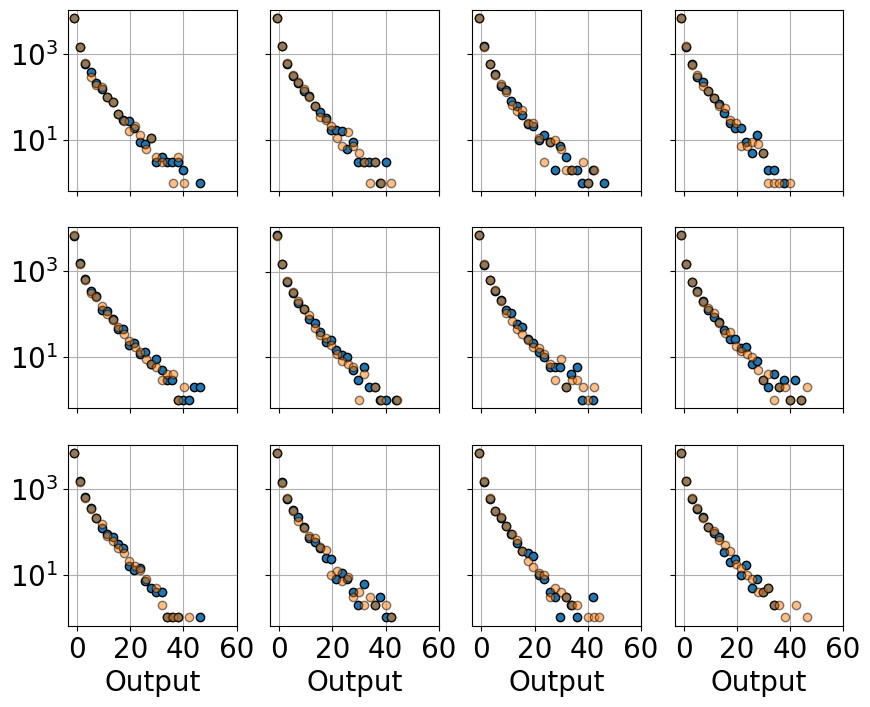

In [18]:

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
nbins=24
alpha=[1,0.5]

for yi,y in enumerate([y0,y1]):

    yn,bins=histogram(y,nbins)
    i=0
    for row in range(3):
        for col in range(4):
            subplot(3,4,i+1)
        
            yn,bins=histogram(y[:,i],bins)

            plot(bins[:-1],yn,'o',mec='k',color=colors[yi],alpha=alpha[yi])
            yscale('log')
            xticks([0,20,40,60])
    
            i+=1
        
            if col!=0:
                gca().set_yticklabels([])
        
            if row!=2:
                gca().set_xticklabels([])
            else:
                xlabel('Output')
    


## bottom of sigmoid=0

In [21]:
dt=200*ms

im=pi5.filtered_images(
                    base_image_file,
                    {'type':'dog','sd1':1,'sd2':3},
                    {'type':'norm'},
                    )
    
pre1=pn.neurons.natural_images(im,
                                rf_size=19,
                                time_between_patterns=dt,
                                            verbose=False)

sigma=0.1
pre1+=pn.neurons.process.add_noise_normal(0,sigma)

pre=pre1

number_of_neurons=12
post=pn.neurons.linear_neuron(number_of_neurons)
post+=pn.neurons.process.sigmoid(0,50)

c=pn.connections.BCM(pre,post,[-.05,.05],[.1,.2])
c+=pn.connections.process.orthogonalization(10*minute)
c.eta=5e-6
c.tau=15*pn.minute   

total_time=5*day
save_interval=10*minute

sim=pn.simulation(total_time)
sim.dt=dt

sim.monitor(post,['output'],save_interval)
sim.monitor(c,['weights','theta'],save_interval)

pn.run_sim(sim,[pre,post],[c],display_hash=True)

 [#############################99% (ETA: 0.2 s)############################# ]Sim Time Elapsed...19.05 s


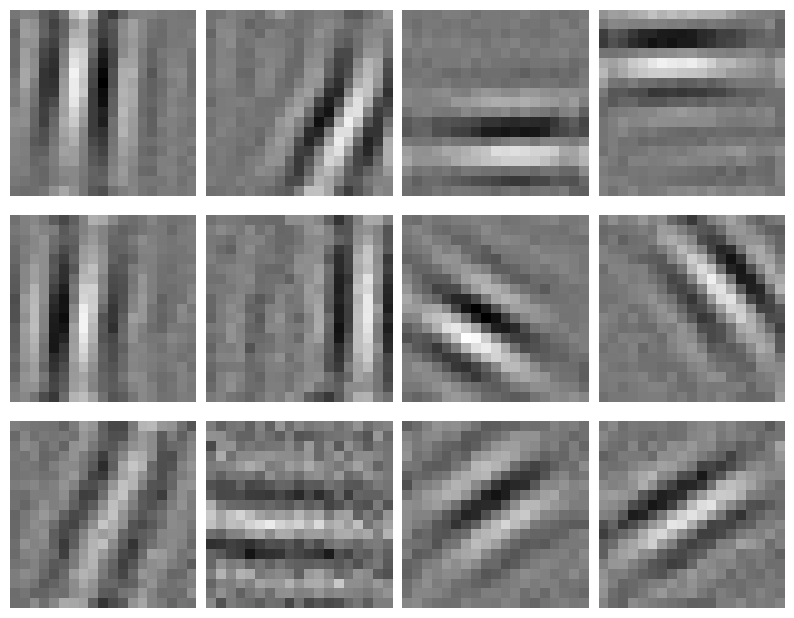

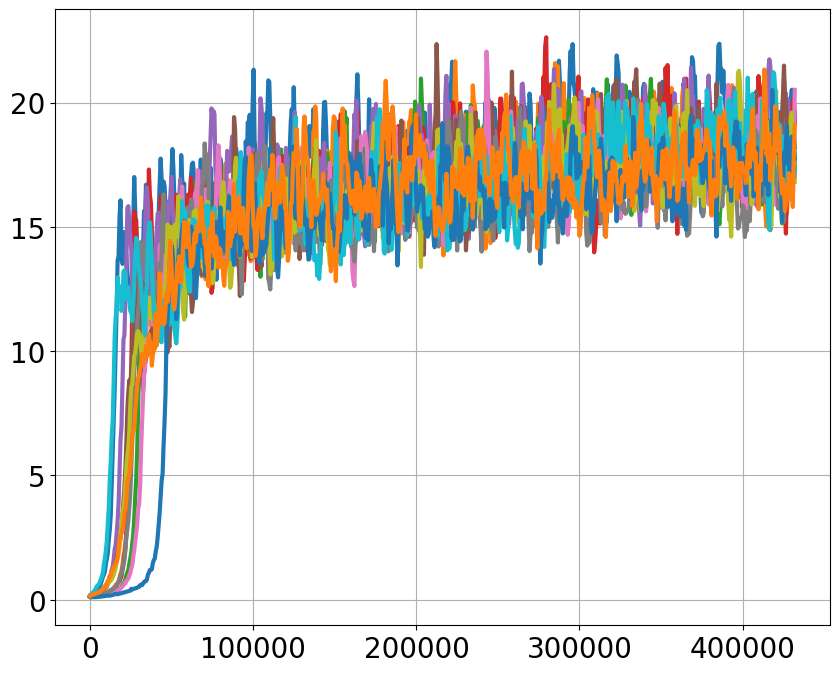

In [56]:
neurons,connections=[pre,post],[c]

c=connections[0]

weights=c.weights
num_neurons=len(weights)
rf_size=neurons[0].rf_size

W=weights.reshape((num_neurons,
                    1,
                    rf_size,rf_size))

vmin,vmax=W.min(),W.max()

count=0
blocks=[]
for row in range(3):
    block_row=[]
    for col in range(4):
        rf=W[count,0,:,:]
        block_row.append(rf)
        if col<4-1:
            block_row.append(vmax*ones((rf_size,1)))

        count+=1

    blocks.append(block_row)

    if row<3-1:
        block_row=[]
        for col in range(4):
            block_row.append(vmax*ones((2,rf_size)))
            if col<4-1:
                block_row.append(vmax*ones((2,1)))
        blocks.append(block_row)


im=np.block(blocks)

figure()
imshow(im,cmap=cm.gray,vmin=vmin,vmax=vmax)
grid(None)
axis('off')

figure()
t,θ=sim.monitors['theta'].arrays()
plot(t,θ);

In [57]:
y=pn.utils.get_output_distributions(sim,neurons,connections,total_time=10000,display_hash=False,print_time=False)

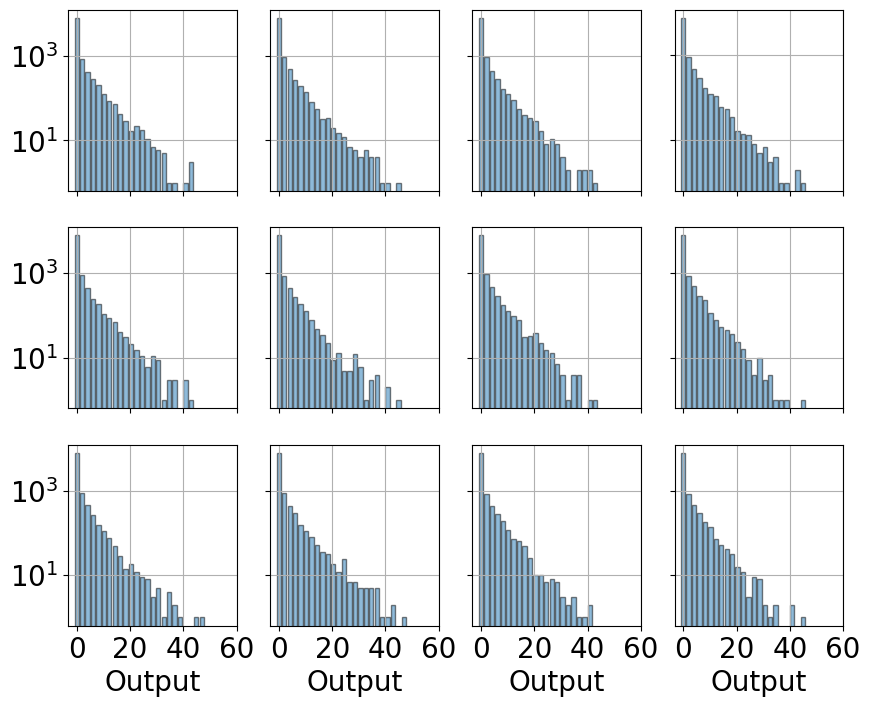

In [77]:

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
nbins=24
alpha=0.5

yn,bins=histogram(y,nbins)
i=0
for row in range(3):
    for col in range(4):
        subplot(3,4,i+1)
    
        yn,bins=histogram(y[:,i],bins)
        
        bar(bins[:-1],yn,width=0.8*(bins[1]-bins[0]),edgecolor='k',color=colors[0],alpha=alpha)
        yscale('log')
        xticks([0,20,40,60])

        i+=1
    
        if col!=0:
            gca().set_yticklabels([])
    
        if row!=2:
            gca().set_xticklabels([])
        else:
            xlabel('Output')

